# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Data

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [4]:
products.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [5]:
transactions.sample(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
882,T00437,C0143,P005,2024-09-11 20:41:10,4,1717.24,429.31
721,T00168,C0023,P083,2024-09-26 17:22:30,3,1367.16,455.72
897,T00756,C0028,P028,2024-02-15 04:29:17,3,706.74,235.58


# Preprocessing

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [8]:
# type conversion
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [11]:
customers.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,NaN
top,C0001,Lawrence Carroll,South America,NaN
freq,1,1,59,NaN
mean,NaN,NaN,NaN,2023-07-19 08:31:12
min,NaN,NaN,NaN,2022-01-22 00:00:00
25%,NaN,NaN,NaN,2022-09-26 12:00:00
50%,NaN,NaN,NaN,2023-08-31 12:00:00
75%,NaN,NaN,NaN,2024-04-12 12:00:00
max,NaN,NaN,NaN,2024-12-28 00:00:00


In [12]:
products.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [13]:
transactions.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,NaN,NaN,NaN,NaN
top,T00001,C0109,P059,NaN,NaN,NaN,NaN
freq,1,11,19,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,NaN,NaN,NaN,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,NaN,NaN,NaN,2024-12-28 11:00:00,4.000000,1991.040000,497.76000


In [14]:
# checking duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [15]:
# checking null values
print("--> Customers")
print(customers.isnull().sum())
print("--> Products")
print(products.isnull().sum())
print("--> Transctions")
print(transactions.isnull().sum())

--> Customers
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
--> Products
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
--> Transctions
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# EDA

<ipython-input-16-1c1007b28173>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


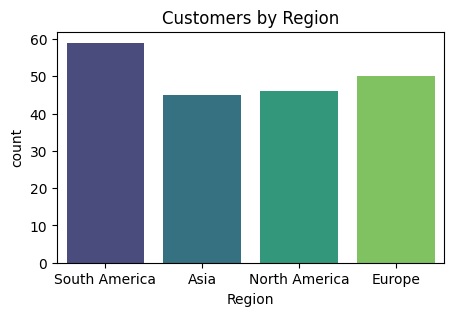

In [16]:
# 1. Customer and Product Distribution Analysis
# 1.1. Region wise total customers
plt.figure(figsize=(5, 3))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title('Customers by Region')
plt.show()

<ipython-input-17-99ddd64a42af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=products, palette='cool')


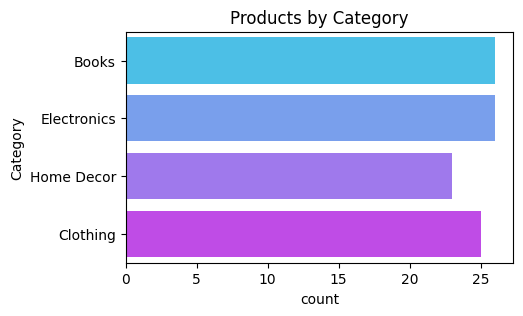

In [17]:
# 1.2. Category wise products
plt.figure(figsize=(5, 3))
sns.countplot(y='Category', data=products, palette='cool')
plt.title('Products by Category')
plt.show()

In [18]:
transactions_with_region = transactions.merge(customers, on='CustomerID')
transactions_with_details = transactions_with_region.merge(products, on='ProductID')
revenue_category_region = transactions_with_details.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

# 1.3. Total spending wise customers
# Top 10 buying customers
top_customers = transactions_with_details.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


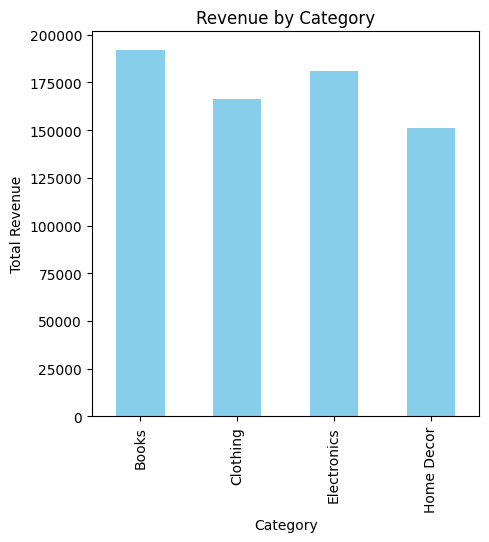

In [19]:
# 2. total revenue generated by the product
# categories from overall the regions
category_revenue = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)

revenue_by_category = transactions_with_details.groupby('Category')['TotalValue'].sum()
revenue_by_category.plot(kind='bar', color='skyblue', figsize=(5, 5), title='Revenue by Category')
plt.ylabel('Total Revenue')
plt.show()

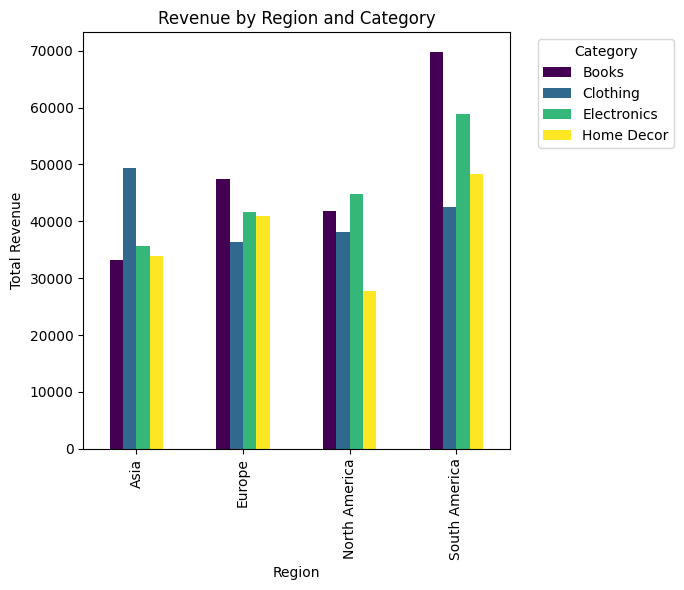

In [20]:
# 3. Plotting individual bars for different categories by region
revenue_category_region.plot(kind='bar', stacked=False, figsize=(7, 6), colormap='viridis', title='Revenue by Region and Category')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Ensure everything fits well
plt.show()

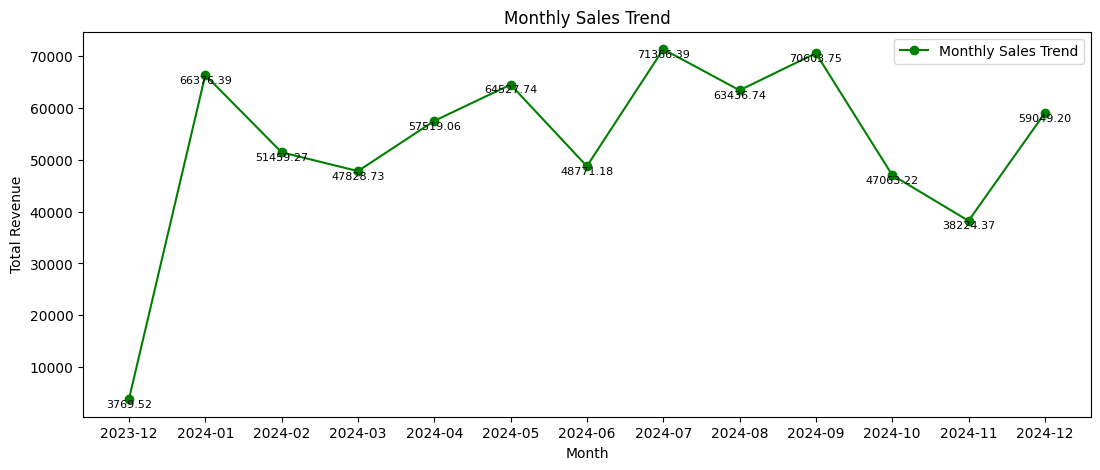

In [22]:
# 4. TIME-SERIES ANALYSIS
# monthly sales trend over time period
transactions_with_details['TransactionDate'] = pd.to_datetime(transactions_with_details['TransactionDate'])
transactions_with_details['TransactionMonth'] = transactions_with_details['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_with_details.groupby('TransactionMonth')['TotalValue'].sum()

plt.figure(figsize=(13, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, color='green', marker='o', label='Monthly Sales Trend')

for x, y in zip(monthly_sales.index.astype(str), monthly_sales.values):
    plt.text(x, y, f'{y:.2f}', fontsize=8, ha='center', va='top')

plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.legend()
plt.show()

In [23]:
# 5. CUSTOMER BEHAVIOUR
# 5.1. clustering
customer_metrics = transactions_with_details.groupby(['CustomerID', 'Region']).agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Quantity': 'sum'
}).reset_index()

customer_metrics.rename(columns={
    'TotalValue': 'TotalRevenue',
    'TransactionID': 'TransactionCount',
    'Quantity': 'TotalQuantity'
}, inplace=True)

scaler = StandardScaler() # Standardizing data for clustering
customer_metrics_scaled = scaler.fit_transform(customer_metrics[['TotalRevenue', 'TransactionCount', 'TotalQuantity']])

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics['Cluster'] = kmeans.fit_predict(customer_metrics_scaled)

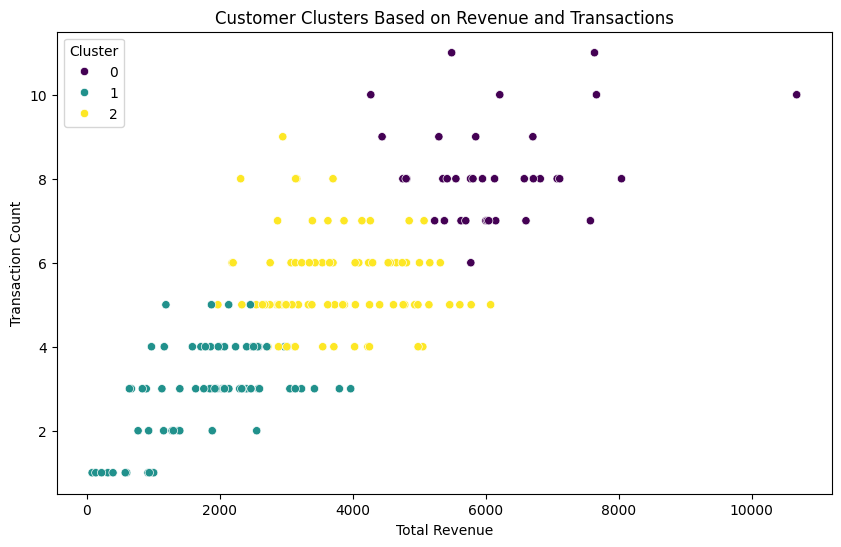

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_metrics['TotalRevenue'],
    y=customer_metrics['TransactionCount'],
    hue=customer_metrics['Cluster'],
    palette='viridis'
)
plt.title('Customer Clusters Based on Revenue and Transactions')
plt.xlabel('Total Revenue')
plt.ylabel('Transaction Count')
plt.show()


In [26]:
# 5.2. summary of clusters
cluster_summary = customer_metrics.groupby('Cluster')[['TotalRevenue', 'TransactionCount', 'TotalQuantity']].sum()
print(cluster_summary)

         TotalRevenue  TransactionCount  TotalQuantity
Cluster                                               
0           227035.67               302            815
1           132890.78               215            513
2           330069.11               483           1209


In [27]:
# 5.3. summary of clusters region wise
region_cluster_distribution = customer_metrics.groupby(['Region', 'Cluster']).size().unstack()
print(region_cluster_distribution)

Cluster         0   1   2
Region                   
Asia           12  21  11
Europe          5  21  24
North America   7  16  23
South America  13  16  30
